In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
%matplotlib inline

In [35]:
"""
In this lab, we will use Wage data. Let us read in the CSV data ans look at a sample of this data.
"""
wage = pd.read_csv('/Users/shilpa/Documents/blog/Sharing_ISL_python/data/Wage.csv', header=0, na_values='NA')
print(wage.shape)
wage.head()

(3000, 12)


,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


## 7.8.1 Polynomial Regression and Step Functions

We will examine how to fit a polynomial regression model on the wage dataset. As all the techniques, we have multiple ways to do this. Here I will use sklearn as we alreadly used statsmodel.api before in Chapter 3.  If you are looking for more built-in functions around p-value, significance, confidence intervie, etc., I would recommend to use statsmodel.api. 

But scikit-learn does not have built error estimates for doing inference. But this problem forces us to think about a more general method to find Confidence Interview (key word: Bootstrap) 

Numpy also has a nice function to do ploynomial regression: https://www.ritchieng.com/machine-learning-polynomial-regression/

In [41]:
n_deg = 4
X = Wage.age.to_numpy()
y = Wage.wage.to_numpy()

X = X.reshape(X.shape[0], 1)
y = y.reshape(y.shape[0], 1)

polynomial_features= PolynomialFeatures(degree=n_deg)
X_poly = polynomial_features.fit_transform(X)

reg = LinearRegression()
reg.fit(X_poly, y)

# get coefficients and compare with the numbers as the end of page 288.
print(reg.intercept_, reg.coef_)

[-184.15417973] [[ 0.00000000e+00  2.12455205e+01 -5.63859312e-01  6.81068771e-03
  -3.20383038e-05]]


[[18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]]
[[1.00000e+00 1.80000e+01 3.24000e+02 5.83200e+03]
 [1.00000e+00 1.90000e+01 3.61000e+02 6.85900e+03]
 [1.00000e+00 2.00000e+01 4.00000e+02 8.00000e+03]
 [1.00000e+00 2.10000e+01 4.41000e+02 9.26100e+03]
 [1.00000e+00 2.20000e+01 4.84000e+02 1.06480e+04]
 [1.00000e+00 2.30000e+01 5.29000e+02 1.21670e+04]
 [1.00000e+00 2.40000e+01 5.76000e+02 1.38240e+04]
 [1.00000e+00 2.50000e+01 6.25000e+02 1.56250e+04]
 [1.00000e+00 2.60000e+01 6.76000e+02 1.75760e+04]
 [1.00000e+00 2.70000e+01 7.29000e+02 1.96830e+04]
 [1.00000e+00 2.80000e+01 7.84000e+02 2.19520e+04]
 [1.00000e+00 2.90000e+01 8.41000e+02 2.43890e+04]
 [1.00000e+00 3

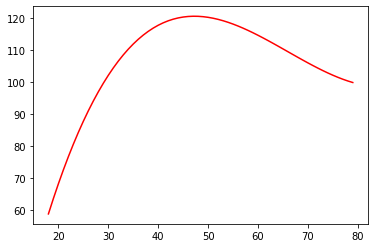

In [50]:
n_deg = 3
# generate a sequence of age values spanning the range
age_grid = np.arange(Wage.age.min(), Wage.age.max()).reshape(-1,1)
print(age_grid)
# generate test data use PolynomialFeatures and fit_transform
X_poly = PolynomialFeatures(degree=n_deg).fit_transform(X)
X_test = PolynomialFeatures(degree=n_deg).fit_transform(age_grid)
print(X_test)
print(age_grid.shape)
print(X_test.shape)
# predict the value of the generated ages
reg = LinearRegression().fit(X_poly,y)
y_pred = reg.predict(X_test)

# creating plots
plt.plot(age_grid, y_pred, color='red')
plt.show()

### Decide on the polynomial to use. 
In the book, the authors did this by using hypothesis testing. ANOVA using F-test was explanied. In order
to use the ANOVA function, $M_1$ and $M_2$ must be nested model: the predictors in $M_1$ must be a subset of the predictors in $M_2$. statsmodel.api has a nice built-in function to do that. 

As an alternative to using hypothesis tests and ANOVA, we could choose the polynomial degree using cross-validation, as discussed in before. 

In [52]:
X1 = PolynomialFeatures(1).fit_transform(X)
X2 = PolynomialFeatures(2).fit_transform(X)
X3 = PolynomialFeatures(3).fit_transform(X)
X4 = PolynomialFeatures(4).fit_transform(X)
X5 = PolynomialFeatures(5).fit_transform(X)
fit1 = sm.GLS(y, X1).fit()
fit2 = sm.GLS(y, X2).fit()
fit3 = sm.GLS(y, X3).fit()
fit4 = sm.GLS(y, X4).fit()
fit5 = sm.GLS(y, X5).fit()

In [53]:
import statsmodels.api as sm
print(sm.stats.anova_lm(fit1, fit2, fit3, fit4, fit5, typ=1))

   df_resid           ssr  df_diff        ss_diff           F        Pr(>F)
0    2998.0  5.022216e+06      0.0            NaN         NaN           NaN
1    2997.0  4.793430e+06      1.0  228786.010128  143.593107  2.363850e-32
2    2996.0  4.777674e+06      1.0   15755.693664    9.888756  1.679202e-03
3    2995.0  4.771604e+06      1.0    6070.152124    3.809813  5.104620e-02
4    2994.0  4.770322e+06      1.0    1282.563017    0.804976  3.696820e-01


/Users/shilpa/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/shilpa/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/shilpa/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The row of the above take shows the fit1 to the quadratic model fit2 is $2.36*10^{-32}$, indicating that a quadratic model is significant informative to a linear model. Similarly, the cubic model is significnat informative to a quadratic model ($p = 1.68 * 10^{-2}$). Hence, either a cubic or a quartic polynomial appear to provide a reasonable fit to the data, but lower- or higher-order models are not justified.

In the book, the authors also discussed logistic regression and the polynomial terms. In python, sm.GLM function provided some functions similar to glm() in R.

In [56]:
logistic_model = sm.GLM ((y>250), X4, family=sm.families.Binomial())
logistic_fit = logistic_model.fit()
print(logistic_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -350.61
Date:                Mon, 14 Sep 2020   Deviance:                       701.22
Time:                        17:14:10   Pearson chi2:                 3.70e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -109.5530     47.655     -2.299      0.0

### Step function
In order to fit a step function, we use the cut() function:

In [62]:
age_cut, bins = pd.cut(Wage.age, bins=4, retbins=True, right=True)
age_cut.value_counts(sort=False)
print(age_cut)

<bound method IndexOpsMixin.value_counts of 0       (17.938, 33.5]
1       (17.938, 33.5]
2         (33.5, 49.0]
3         (33.5, 49.0]
4         (49.0, 64.5]
             ...      
2995      (33.5, 49.0]
2996    (17.938, 33.5]
2997    (17.938, 33.5]
2998    (17.938, 33.5]
2999      (49.0, 64.5]
Name: age, Length: 3000, dtype: category
Categories (4, interval[float64]): [(17.938, 33.5] < (33.5, 49.0] < (49.0, 64.5] < (64.5, 80.0]]>


Here cut() automatically picked the cutpoints at 33.5, 49, and 64.5 years of age. We could also have specified our own cutpoints directly using the breaks option  (set bins into a sequence of scalars, e.g. [0, 10, 20, 40, 100]). Note in the following code, I manually added a constant column and dropped the lowest value bin (17.938, 33.5] dummy variable.

In [66]:
age_cut_dummies = pd.get_dummies(age_cut)
age_cut_dummies = sm.add_constant(age_cut_dummies)
print(age_cut_dummies.columns[1])
print(age_cut_dummies)
fit_age_cut = sm.GLM(Wage.wage, age_cut_dummies.drop(age_cut_dummies.columns[1], axis=1)).fit()
print(fit_age_cut.summary())

(17.938, 33.5]
      const  (17.938, 33.5]  (33.5, 49.0]  (49.0, 64.5]  (64.5, 80.0]
0       1.0               1             0             0             0
1       1.0               1             0             0             0
2       1.0               0             1             0             0
3       1.0               0             1             0             0
4       1.0               0             0             1             0
...     ...             ...           ...           ...           ...
2995    1.0               0             1             0             0
2996    1.0               1             0             0             0
2997    1.0               1             0             0             0
2998    1.0               1             0             0             0
2999    1.0               0             0             1             0

[3000 rows x 5 columns]
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   wage   N

## 7.8.2 Splines
In order to fit regression splines in python, we use the spatsy library. In Section 7.4, we saw that regression splines can be fit by constructing an appropriate matrix of basis functions. The bs() function generates the entire matrix of bs() basis functions for splines with the specified set of knots.

In [67]:
from patsy import dmatrix

Here we have prespecified knots at ages 25, 40, and 60. This produces a spline with six basis functions. 

In [96]:
age_grid = np.arange(Wage.age.min(), Wage.age.max()).reshape(-1,1)
print(Wage.age.shape)
spline_basis1 = dmatrix("bs(Wage.age, knots=(25,40,60), degree=3, include_intercept=False)", {"Wage.age": Wage.age}, return_type='dataframe')
spline_basis1

(3000,)


,Intercept,"bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1.0,0.559911,0.403778,0.033395,0.000000,0.000000,0.0
2,1.0,0.000000,0.114796,0.618564,0.262733,0.003906,0.0
3,1.0,0.000000,0.167109,0.633167,0.198880,0.000844,0.0
4,1.0,0.000000,0.034014,0.508194,0.426542,0.031250,0.0
...,...,...,...,...,...,...,...
2995,1.0,0.000000,0.139320,0.628472,0.230208,0.002000,0.0
2996,1.0,0.137741,0.629111,0.228819,0.004329,0.000000,0.0
2997,1.0,0.302617,0.586851,0.110255,0.000277,0.000000,0.0
2998,1.0,0.302617,0.586851,0.110255,0.000277,0.000000,0.0


Here we have prespecified knots at ages 25, 40, and 60. This produces a spline with six basis functions. 

In [97]:
spline_fit1 = sm.GLM(Wage.wage, spline_basis1).fit()
spline_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2993
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          1594.0
Method:                          IRLS   Log-Likelihood:                -15314.
Date:                Tue, 15 Sep 2020   Deviance:                   4.7708e+06
Time:                        03:11:48   Pearson chi2:                 4.77e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 60.4937      9.460      6.394      0.000      41.952      79.036
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.9805     12.538      0.317      0.751     -20.593      28.554
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.6310      9.626      4.636      0.000      25.764      63.498
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.8388     10.755      5.843      0.000      41.759      83.919
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.9908     10.706      5.230      0.000      35.007      76.975
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.6881     14.402      3.520      0.000      22.461      78.915
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.6061     19.126      0.868      0.385     -20.881      54.093
==========================================================================================================================================
"""

In [93]:
# Another approach is to fix the degree of freedom and let the code to automatically choose the knots.
spline_basis2 = dmatrix("bs(Wage.age, df=6, include_intercept=False)",
                        {"Wage.age": Wage.age}, return_type='dataframe')
spline_fit2 = sm.GLM(Wage.wage, spline_basis2).fit()
spline_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2993
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          1592.5
Method:                          IRLS   Log-Likelihood:                -15313.
Date:                Tue, 15 Sep 2020   Deviance:                   4.7662e+06
Time:                        03:11:00   Pearson chi2:                 4.77e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         56.3138      7.258      7.759      0.000      42.088      70.539
bs(Wage.age, df=6, include_intercept=False)[0]    27.8240     12.435      2.238      0.025       3.453      52.195
bs(Wage.age, df=6, include_intercept=False)[1]    54.0625      7.127      7.585      0.000      40.093      68.032
bs(Wage.age, df=6, include_intercept=False)[2]    65.8284      8.323      7.909      0.000      49.515      82.142
bs(Wage.age, df=6, include_intercept=False)[3]    55.8127      8.724      6.398      0.000      38.714      72.911
bs(Wage.age, df=6, include_intercept=False)[4]    72.1315     13.745      5.248      0.000      45.192      99.071
bs(Wage.age, df=6, include_intercept=False)[5]    14.7509     16.209      0.910      0.363     -17.018      46.519
==================================================================================================================
"""

In [92]:
# Package patsy also has a nice function to do natural spline, cr()
spline_basis3 = dmatrix("cr(Wage.age, df=4)", {"Wage.age": Wage.age}, return_type='dataframe')
spline_fit3 = sm.GLM(Wage.wage, spline_basis3).fit()
spline_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          1596.4
Method:                          IRLS   Log-Likelihood:                -15318.
Date:                Tue, 15 Sep 2020   Deviance:                   4.7827e+06
Time:                        03:10:53   Pearson chi2:                 4.78e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                79.6421      1.773     44.918      0.000      76.167      83.117
cr(Wage.age, df=4)[0]   -14.6678      3.436     -4.269      0.000     -21.402      -7.934
cr(Wage.age, df=4)[1]    36.8111      1.950     18.880      0.000      32.990      40.632
cr(Wage.age, df=4)[2]    35.9349      2.056     17.476      0.000      31.905      39.965
cr(Wage.age, df=4)[3]    21.5639      6.989      3.085      0.002       7.865      35.263
=========================================================================================
"""

In [98]:
# Finally, let us makesome predictions
pred1 = spline_fit1.predict(dmatrix("bs(age_grid, knots=(25,40,60), include_intercept=False)",{"age_grid": age_grid}, return_type='dataframe'))
pred2 = spline_fit2.predict(dmatrix("bs(age_grid, df=6, include_intercept=False)",{"age_grid": age_grid}, return_type='dataframe'))
pred3 = spline_fit3.predict(dmatrix("cr(age_grid, df=4)", {"age_grid": age_grid}, return_type='dataframe'))

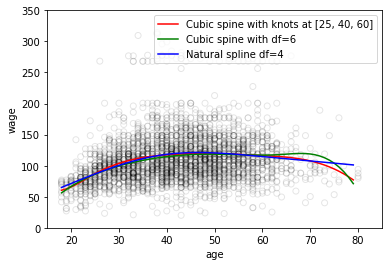

In [99]:
# Plot the splines and error bands
plt.scatter(Wage.age, Wage.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(age_grid, pred1, color='r', label='Cubic spine with knots at [25, 40, 60]')
plt.plot(age_grid, pred2, color='g', label='Cubic spine with df=6')
plt.plot(age_grid, pred3, color='b', label='Natural spline df=4')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()